In [1]:
import sys
sys.path.append("../")

from pprint import pprint
from Core.maze import Maze, INF

import random
from queue import PriorityQueue

In [2]:
def BinaryTree(maze, min_value):
    flag = 0
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            temp = []
            if x > 0:
                temp.append('W')
            if y > 0:
                temp.append('N')
            if len(temp) == 0:
                continue
            direction = random.randint(0, len(temp)-1)
            maze.add_path((x, y), temp[direction], random.randint(min_value, 10))

In [36]:
def uniform_cost_search(maze, start, end):
    
    # setup
    explored = set()
    frontier = PriorityQueue()
    node = start
    cost = 0
    n_rows = len(maze.grid)
    n_cols = len(maze.grid[0])
    parents = [[(-1, -1)]*n_cols for i in range(n_rows)]


    # init
    frontier.put((cost, node))
    while not frontier.empty():
        cost, node = frontier.get()
        if node == end:
            return True, cost, parents

        explored.add(node)
        x, y = node

        neighbors = maze.grid[x][y].neighbors
        if neighbors['N'] != INF and (x-1, y) not in explored and x>0:
            frontier.put((cost+neighbors['N'], (x-1, y)))
            parents[x-1][y] = (x, y)
        if neighbors['S'] != INF and (x+1, y) not in explored and x+1<n_rows:
            frontier.put((cost+neighbors['S'], (x+1, y)))
            parents[x+1][y] = (x, y)
        if neighbors['E'] != INF and (x, y+1) not in explored and y+1<n_cols:
            frontier.put((cost+neighbors['E'], (x, y+1)))
            parents[x][y+1] = (x, y)
        if neighbors['W'] != INF and (x, y-1) not in explored and y>0:
            frontier.put((cost+neighbors['W'], (x, y-1)))
            parents[x][y-1] = (x, y)


    return False, -1, []


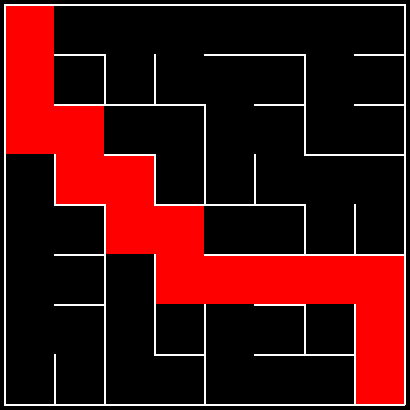

In [42]:
maze = Maze()
maze.load("BinaryTree_8x8.maze")

start = (0, 0)
end = (8-1, 8-1)

found, cost, parents = uniform_cost_search(maze, start, end)

node = end
path = [node]
while node != start:
    node = parents[node[0]][node[1]]
    path.append(node)

if found:
    # print("Cost is: ", cost)
    # print(path)
    maze.add_colors(path = path)
    display(maze.draw())
else:
    print("Path not found!")

# Dump

## General Over-view
https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Practical_optimizations_and_infinite_graphs

## Proof by induction
https://stackoverflow.com/questions/37641415/how-to-prove-that-uniform-cost-search-algorithm-always-output-optimal-path

## PQ in python3
https://docs.python.org/3/library/queue.html

## Dijkstra VS UCS
Dijkstra's Algorithm finds the shortest path from the root node to every other node. uniform cost searches for shortest paths in terms of cost from the root node to a goal node. Uniform Cost Search is Dijkstra's Algorithm which is focused on finding a single shortest path to a single finishing point rather than the shortest path to every point.

UCS does this by stopping as soon as the finishing point is found. For Dijkstra, there is no goal state and processing continues until all nodes have been removed from the priority queue, i.e. until shortest paths to all nodes (not just a goal node) have been determined.

UCS has fewer space requirements, where the priority queue is filled gradually as opposed to Dijkstra's, which adds all nodes to the queue on start with an infinite cost.

As a result of the above points, Dijkstra is more time consuming than UCS

UCS is usually formulated on trees while Dijkstra is used on general graphs

Djikstra is only applicable in explicit graphs where the entire graph is given as input. UCS starts with the source vertex and gradually traverses the necessary parts of the graph. Therefore, it is applicable for both explicit graphs and implicit graphs (where states/nodes are generated).